In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv(r"C:\Users\asus\Downloads\archive (4)\data.csv")

In [4]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Malignant = 1, Benign = 0

In [5]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [10]:
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [11]:
print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.98
Recall: 0.95
ROC AUC: 1.00


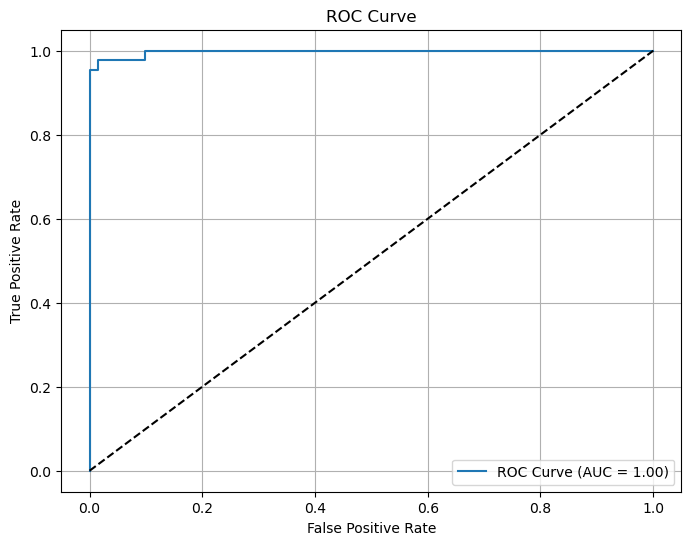

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [13]:
custom_threshold = 0.4
y_pred_custom = (y_prob >= custom_threshold).astype(int)

In [14]:
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)

In [15]:
print(f"\nCustom Threshold = {custom_threshold}")
print(f"Precision (custom): {precision_custom:.2f}")
print(f"Recall (custom): {recall_custom:.2f}")


Custom Threshold = 0.4
Precision (custom): 0.98
Recall (custom): 0.98


In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

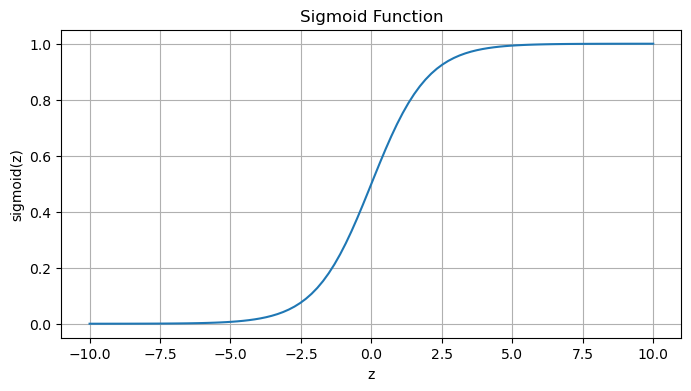

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()